In [1]:
# --- Standardizing Numeric Data --- #

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
# Data from https://roycekimmons.com/system/generate_data.php?dataset=exams&n=100
exam_df = pd.read_csv('datasets/exam-scores/train.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
99,male,group D,high school,standard,none,73,71,67
26,female,group C,some high school,standard,completed,60,68,67
73,female,group A,high school,standard,none,72,74,74
19,male,group D,some high school,standard,none,66,65,65
39,male,group A,bachelor's degree,standard,completed,100,100,96


In [4]:
exam_df.describe()

,math score,reading score,writing score
count,100.00000,100.000000,100.000000
mean,68.34000,70.850000,69.060000
std,17.70135,16.560495,16.997813
min,23.00000,35.000000,29.000000
25%,57.00000,57.750000,55.500000
50%,71.00000,72.000000,69.000000
75%,81.25000,83.000000,81.000000
max,100.00000,100.000000,100.000000


In [5]:
from sklearn import preprocessing

# Standardize the dataset to have 0 mean and unit variance (variance of 1)
# This allows us to compare values across different distributions
# Under the hood, this subtracts a column's mean from each value in that column
    # Then divides each value by the column's standard deviation
exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [6]:
exam_df.head()

# Negative scaled scores are below the mean, positive are above the mean
# < -1.00 is > 1 standard deviation below the mean
# > 1.00 is > 1 standard deviation above the mean

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some high school,standard,none,0.321360,-0.658474,-0.713077
1,female,group C,some college,standard,completed,0.264583,0.615992,1.001619
2,male,group C,associate's degree,standard,none,0.775580,-0.172963,-0.062675
3,female,group C,associate's degree,standard,none,0.718803,0.737370,1.119874
4,female,group C,associate's degree,free/reduced,completed,-0.303192,0.676681,0.587727


In [7]:
exam_df.describe()

# Note means are very close to 0 and std is very close to 1

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.103873e-16,3.757411e-16,-1.257328e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.574290e+00,-2.175696e+00,-2.368647e+00
25%,-6.438565e-01,-7.950243e-01,-8.017686e-01
50%,1.510281e-01,6.979221e-02,-3.547649e-03
75%,7.329971e-01,7.373698e-01,7.059821e-01
max,1.797575e+00,1.769081e+00,1.829404e+00


In [8]:
# Note that all categorical values need to be converted to numerical values before they can be used in an ML model
# See below two examples

In [9]:
# (1) When the values have an order, that order needs to be handled

# For example, 'parental level of education' does have an order
exam_df['parental level of education'].unique()

array(['some high school', 'some college', "associate's degree",
       "master's degree", 'high school', "bachelor's degree"],
      dtype=object)

In [10]:
# Because the order isn't inherent (e.g., isn't alphabetic), enumerate the explicit order
parental_level_of_education = [
    'some high school',
    'high school', 
    'some college', 
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# This commnted-out array was an attempt to get LabelEncoder to enforce order - see next cell for context
# parental_level_of_education = [
#     ['some high school', 0],
#     ['high school', 1], 
#     ['some college', 2], 
#     ["associate's degree", 3],
#     ["bachelor's degree", 4],
#     ["master's degree", 5]
# ]

In [11]:
# The ordered categorical values can then be converted to ordered integer values using LabelEncoder

label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(parental_level_of_education)

# Print the encoded values
label_encoding.classes_

# Note: The LabelEncoder is not adhering to the provided order - this is a problem
# Watching the tutorial closely, it appears this error exists there as well
# I left a comment on the tutorial and have looked into it a bit myself
# It seems OrdinalEncoder may be the more appropriate utility
# But leaving it for now and moving on

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [12]:
exam_df['parental level of education'] = label_encoding.transform(exam_df['parental level of education'].astype(str))

In [13]:
# Show the updated dataframe with the encoded 'parental level of education' column
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,5,standard,none,0.321360,-0.658474,-0.713077
1,female,group C,4,standard,completed,0.264583,0.615992,1.001619
2,male,group C,0,standard,none,0.775580,-0.172963,-0.062675
3,female,group C,0,standard,none,0.718803,0.737370,1.119874
4,female,group C,0,free/reduced,completed,-0.303192,0.676681,0.587727


In [14]:
# (2) When categorical values do not have an intrinsic order, covert them using one-hot encoding

# For example, 'race/ethnicity' does not have an order
# get_dummies will replace the 'race/ethnicity' column with one column per value, each new column value being a 0 or 1
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,5,standard,none,0.321360,-0.658474,-0.713077,0,1,0,0,0
1,female,4,standard,completed,0.264583,0.615992,1.001619,0,0,1,0,0
2,male,0,standard,none,0.775580,-0.172963,-0.062675,0,0,1,0,0
3,female,0,standard,none,0.718803,0.737370,1.119874,0,0,1,0,0
4,female,0,free/reduced,completed,-0.303192,0.676681,0.587727,0,0,1,0,0


In [15]:
# Handle the remaining unordered categorical features
exam_df = pd.get_dummies(exam_df, columns=['gender', 'lunch', 'test preparation course'])

In [16]:
exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,5,0.321360,-0.658474,-0.713077,0,1,0,0,0,0,1,0,1,0,1
1,4,0.264583,0.615992,1.001619,0,0,1,0,0,1,0,0,1,1,0
2,0,0.775580,-0.172963,-0.062675,0,0,1,0,0,0,1,0,1,0,1
3,0,0.718803,0.737370,1.119874,0,0,1,0,0,1,0,0,1,0,1
4,0,-0.303192,0.676681,0.587727,0,0,1,0,0,1,0,1,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

# Use all features other than math score to predict math score
X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
x_train.shape, x_test.shape

((80, 14), (20, 14))

In [19]:
y_train.shape, y_test.shape

((80,), (20,))

In [ ]:
# Note: Dummary variable trap of perfect collinearity can be caused by including all one-hot encoding columns w/ fit_intercept=True
# Below are two examples of fitting the model, each with a different value for fit_intercept
# In the end, the fit_intercept value did not matter because LinearRegression estimator handles under the hood 
# i.e., it will always be set to False if all one-hot encoded columns are used

In [21]:
from sklearn.linear_model import LinearRegression

# fit_intercept=True
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [22]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.9368684463259643


In [26]:
y_pred = linear_model.predict(x_test)

In [30]:
from sklearn.metrics import r2_score

print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.9364949732519242


In [31]:
# fit_intercept=False - note the same train and test scores
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [32]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.9368684463259643


In [33]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.9364949732519242


In [36]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
0,-0.180826,0.321360
12,-0.170859,-0.303192
89,-1.861151,-1.665851
84,0.782489,0.832358
80,0.190125,-0.303192
39,1.885622,1.797575
65,-0.818634,-0.587079
15,-0.236907,-0.189637
95,1.192563,1.286577
28,1.227920,1.173022


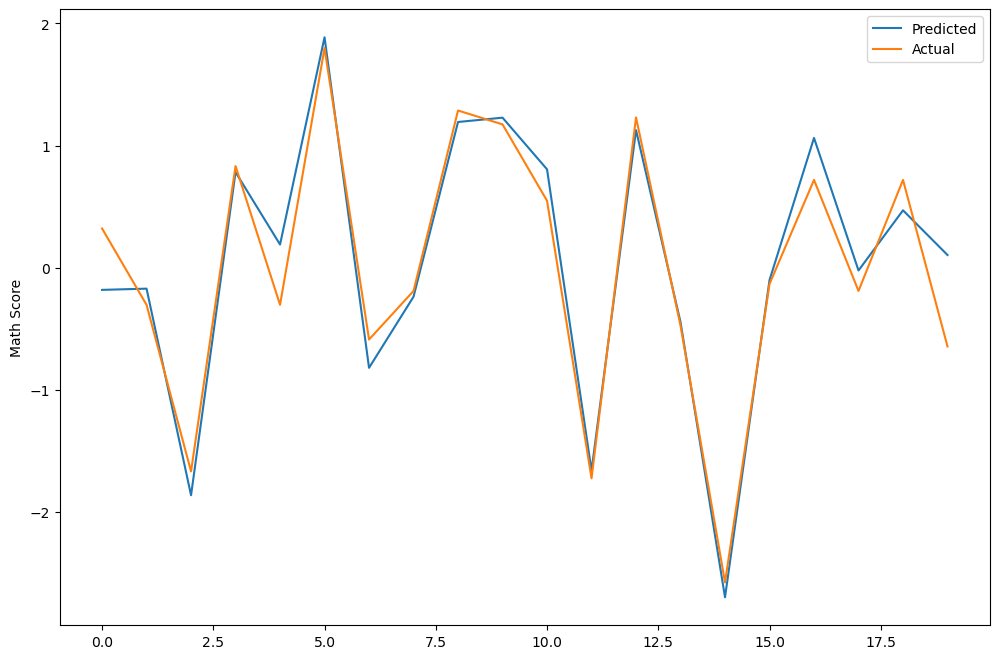

In [38]:
plt.figure(figsize=(12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Math Score')

plt.legend()
plt.show()

In [39]:
# This time predict without using the other scores (reading, writing)

X = exam_df.drop(['math score', 'writing score', 'reading score'], axis=1)
Y = exam_df['math score']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
print("Training score: ", linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print("Testing score: ", r2_score(y_test, y_pred))

# Note how low the scores are

Training score:  0.3622264828937567
Testing score:  0.18292755963096952
